# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [35]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&units=metric&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | general levalle
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | lerwick
Processing Record 8 of Set 1 | hannibal
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | kintampo
Processing Record 11 of Set 1 | parkes
Processing Record 12 of Set 1 | sinabang
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | kailaras
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | tres arroyos
Processing Record 21 of Set 1 | happy valley-goose bay
Processing Rec

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,general levalle,-34.0147,-63.9241,15.35,90,100,0.59,AR,1714952420
1,puerto natales,-51.7236,-72.4875,-1.53,86,16,1.63,CL,1714952424
2,invercargill,-46.4000,168.3500,7.79,76,80,6.26,NZ,1714952424
3,olonkinbyen,70.9221,-8.7187,1.05,92,100,12.41,SJ,1714952424
4,avarua,-21.2078,-159.7750,27.03,94,100,6.17,CK,1714952169


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,general levalle,-34.0147,-63.9241,15.35,90,100,0.59,AR,1714952420
1,puerto natales,-51.7236,-72.4875,-1.53,86,16,1.63,CL,1714952424
2,invercargill,-46.4000,168.3500,7.79,76,80,6.26,NZ,1714952424
3,olonkinbyen,70.9221,-8.7187,1.05,92,100,12.41,SJ,1714952424
4,avarua,-21.2078,-159.7750,27.03,94,100,6.17,CK,1714952169


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

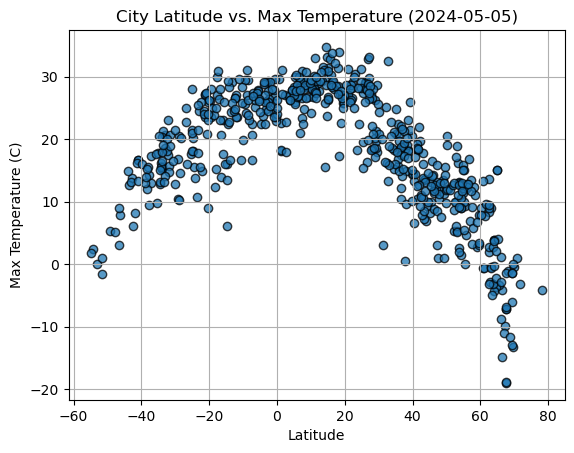

In [75]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature " + time.strftime("(%Y-%m-%d)"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

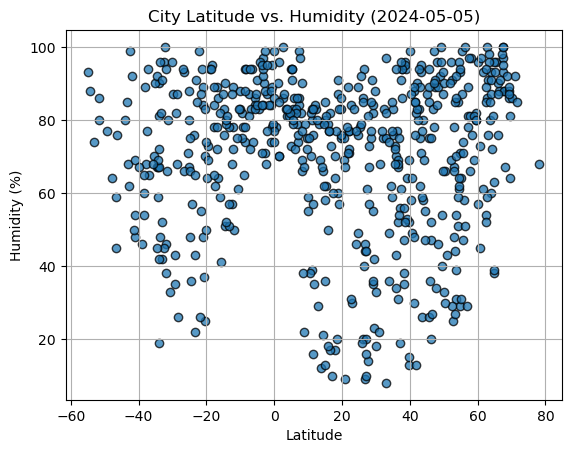

In [76]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + time.strftime("(%Y-%m-%d)"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

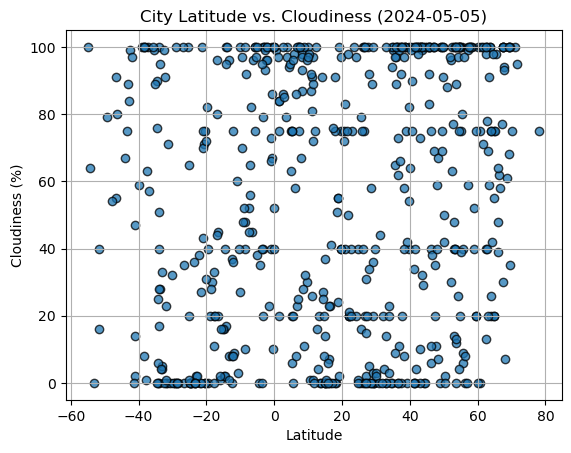

In [77]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("(%Y-%m-%d)"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

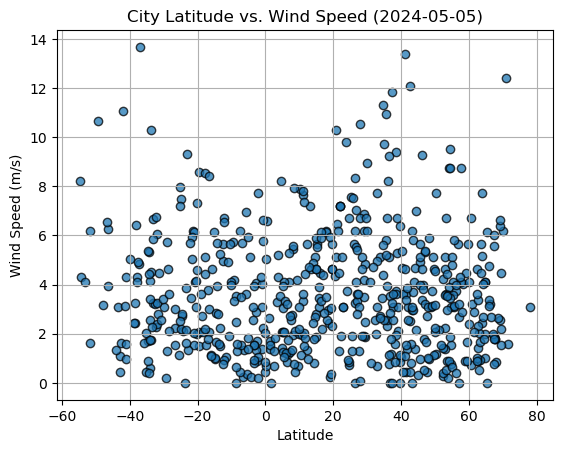

In [78]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + time.strftime("(%Y-%m-%d)"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [117]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, xytext, ylabel):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xytext, fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [118]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,olonkinbyen,70.9221,-8.7187,1.05,92,100,12.41,SJ,1714952424
6,lerwick,60.1545,-1.1494,9.00,96,100,2.41,GB,1714952424
7,hannibal,39.7084,-91.3585,20.53,52,40,0.00,US,1714952424
9,kintampo,8.0563,-1.7306,24.88,90,87,1.93,GH,1714952425
11,sinabang,2.4803,96.3801,27.12,86,86,0.69,ID,1714952425


In [119]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,general levalle,-34.0147,-63.9241,15.35,90,100,0.59,AR,1714952420
1,puerto natales,-51.7236,-72.4875,-1.53,86,16,1.63,CL,1714952424
2,invercargill,-46.4000,168.3500,7.79,76,80,6.26,NZ,1714952424
4,avarua,-21.2078,-159.7750,27.03,94,100,6.17,CK,1714952169
5,grytviken,-54.2811,-36.5092,2.42,88,64,4.32,GS,1714952424


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7504538612452065


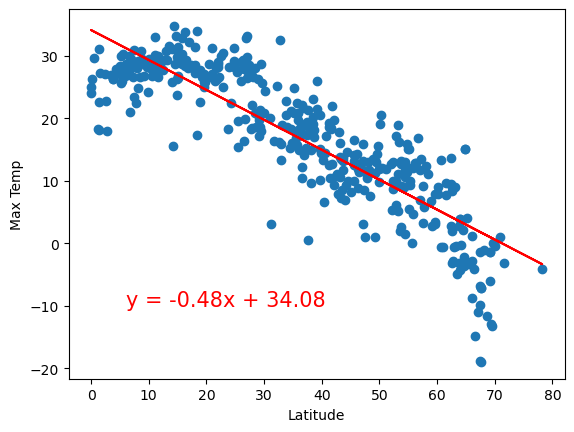

In [120]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plot(x_values,y_values, (6, -10), "Max Temp")

The r-value is: 0.6103049429507729


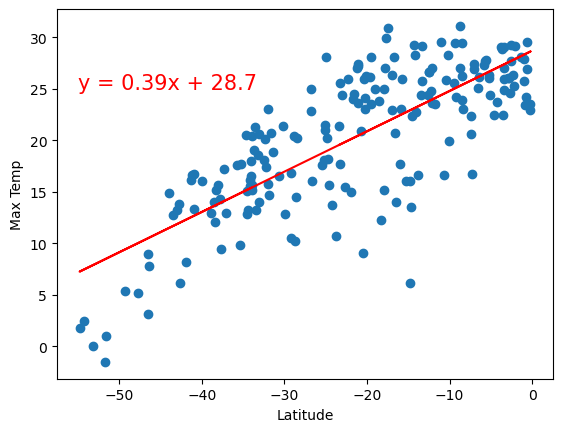

In [126]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plot(x_values,y_values, (-55, 25), "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Strong correlation between lower absolute value of latitude (proximity to equator) resulting in higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.012918701062542993


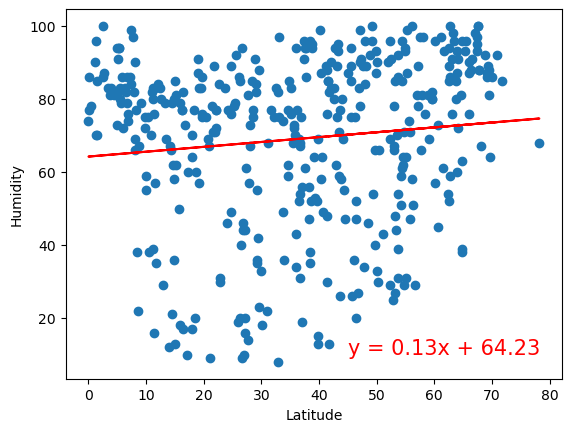

In [128]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plot(x_values,y_values, (45, 10), "Humidity")

The r-value is: 0.07337373930095498


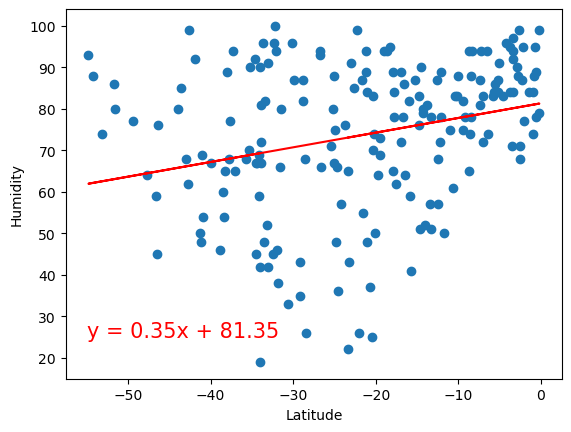

In [130]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plot(x_values,y_values, (-55, 25), "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Between lower r-value and slightly opposing results between the two hemisphere, a correlation does not appear to exist between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.018617919416358476


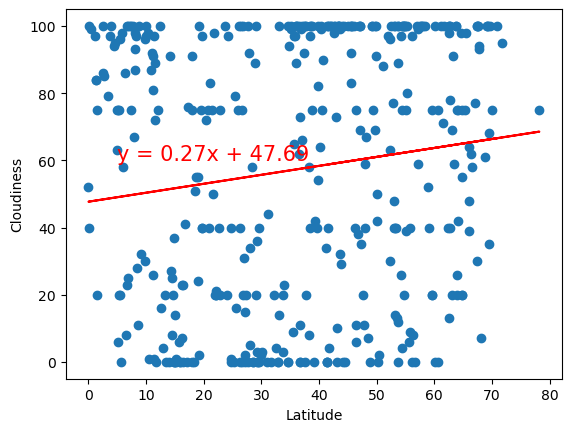

In [137]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plot(x_values,y_values, (5, 60), "Cloudiness")

The r-value is: 0.01127205311559639


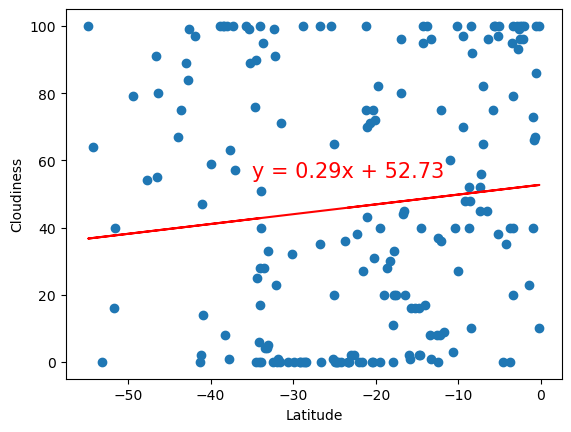

In [135]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plot(x_values,y_values, (-35, 55), "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Between lower r-value and slightly opposing results between the two hemisphere, a correlation does not appear to exist between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0007915229260670729


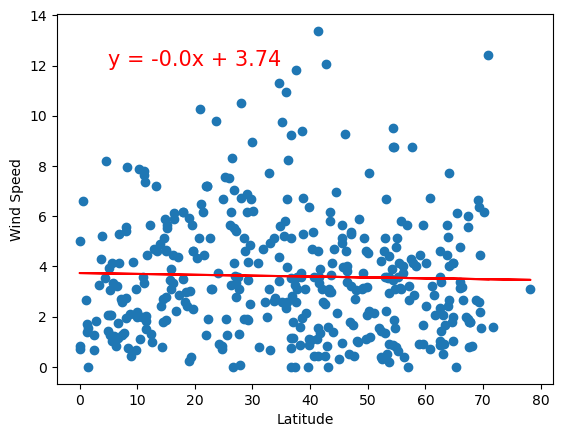

In [139]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plot(x_values,y_values, (5, 12), "Wind Speed")

The r-value is: 0.03700535982180475


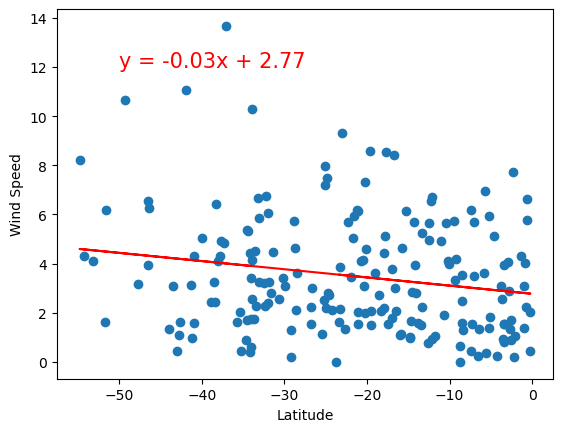

In [140]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plot(x_values,y_values, (-50, 12), "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Between lower r-value and slightly opposing results between the two hemisphere, a correlation does not appear to exist between latitude and wind speed.